In [6]:
!pip install openpyxl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]


In [7]:
import pandas as pd

data_full = pd.read_excel("data/Capstone_Final_Dataset.xlsx")

In [8]:
data_full

,Organization,Category,Crowdfunding,Collegiate,Pro Sports League,Pro Sports (NFL),Pro Sports (MLB),Pro Sports (USL),Pro Sports (NBA),Pro Sports (MLS),...,DEI Priorities,Tier,Verified Grant URL / Contact,Confirmed Application Deadlines,Strategic Note / Pitch Angle,Partnership Potential,Best Pitch Angle,Enhanced Notes,Contact Person,Application Process
0,Kickstarter,Crowdfunding,1,0,0,0,0,0,0,0,...,Likely - Verify,3,https://www.kickstarter.com/,Rolling,"Best for a specific, tangible project (e.g., '...",Community integration,Sports-math curriculum,Best for project-based funding with tangible r...,https://www.kickstarter.com/,Rolling
1,Indiegogo,Crowdfunding,1,0,0,0,0,0,0,0,...,Likely - Verify,3,https://www.indiegogo.com/,Rolling,"A strong alternative to Kickstarter, especiall...",Community integration,Sports-math curriculum,Similar to Kickstarter but offers more flexibl...,https://www.indiegogo.com/,Rolling
2,University of Florida Foundation,Collegiate,0,1,0,0,0,0,0,0,...,Likely - Verify,1,"Kim Kruse, Corporate & Foundation Giving: ktk@...",Varies; partnership-based,LOCAL ADVANTAGE. Propose a research partnershi...,Pilot programs,College prep through sports learning,Directly approaching the Corporate & Foundatio...,"Kim Kruse, Corporate & Foundation Giving: ktk@...",Research needed
3,Florida State University Research Foundation,Collegiate,0,1,0,0,0,0,0,0,...,Likely - Verify,1,research@magnet.fsu.edu; https://www.research....,Varies by program,"LOCAL ADVANTAGE. Target the GAP program, posit...",Pilot programs,College prep through sports learning,The 'Grants for Application Proof of Concept (...,research@magnet.fsu.edu,Research needed
4,NFL Foundation,Pro Sports League,0,0,1,0,0,0,0,0,...,Likely - Verify,3,https://www.nflfoundation.org/applications/gra...,Youth Camp Grants: ~Apr 15; YET Grants: ~Dec 3...,Initial intelligence about a mandatory partner...,Community integration,Football statistics and math skills,Key Intel: The NFL's grantmaking is in partner...,https://bobwoodrufffoundation.org/programs/net...,Research needed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,University of Colorado Boulder - Office for Ou...,Collegiate,0,1,0,0,0,0,0,0,...,Likely - Verify,2,outreach@colorado.edu,Varies,NaN,Pilot programs,College prep through sports learning,NaN,outreach@colorado.edu,Partnership-based
196,University of Utah - Bennion Community Center,Collegiate,0,1,0,0,0,0,0,0,...,Likely - Verify,2,info@bennioncenter.org,Varies,NaN,Pilot programs,College prep through sports learning,Varies,The hub for community service and engagement a...,info@bennioncenter.org
197,Kansas State University - Center for Engagemen...,Collegiate,0,1,0,0,0,0,0,0,...,Likely - Verify,2,cecd@ksu.edu,Varies,NaN,Pilot programs,College prep through sports learning,NaN,cecd@ksu.edu,Partnership-based
198,University of Central Florida - Community Enga...,Collegiate,0,1,0,0,0,0,0,0,...,Likely - Verify,1,ginsburgcenter@ucf.edu,Varies,PRIME FL TARGET. The UCF Center for Community ...,PRIME FL TARGET,College prep through sports learning,PRIME FL TARGET. The UCF Center for Community ...,ginsburgcenter@ucf.edu,Partnership-based


In [9]:
data_full.columns.unique()

Index(['Organization', 'Category', 'Crowdfunding', 'Collegiate',
       'Pro Sports League', 'Pro Sports (NFL)', 'Pro Sports (MLB)',
       'Pro Sports (USL)', 'Pro Sports (NBA)', 'Pro Sports (MLS)',
       'Pro Sports (NHL)', 'Thought Leader', 'National Non-Profit',
       'Federal Grant', 'Venture Capital', 'Athlete Foundation',
       'Corporate Foundation', 'Education Foundation', 'Geographic Scope',
       'Geo_Focus', 'Mission / Stated Pillars', 'Financial Funder',
       'Typical Grant Size', 'Typical Min. Grant Size',
       'Typical Max. Grant Size', 'DEI Priorities', 'Tier',
       'Verified Grant URL / Contact', 'Confirmed Application Deadlines',
       'Strategic Note / Pitch Angle', 'Partnership Potential',
       'Best Pitch Angle', 'Enhanced Notes', 'Contact Person',
       'Application Process'],
      dtype='object')

In [10]:
#First I will keep only Geo info, Category info, Grant info, and Mission/Pillar info
data_full = data_full.drop(columns=[
    'Category', 
    'Geographic Scope',
    'DEI Priorities', 'Tier',
    'Verified Grant URL / Contact', 'Confirmed Application Deadlines',
    'Strategic Note / Pitch Angle', 'Partnership Potential',
    'Best Pitch Angle', 'Enhanced Notes', 'Contact Person', 'Typical Grant Size',
    'Application Process'
])


In [11]:
data_full.columns.unique()

Index(['Organization', 'Crowdfunding', 'Collegiate', 'Pro Sports League',
       'Pro Sports (NFL)', 'Pro Sports (MLB)', 'Pro Sports (USL)',
       'Pro Sports (NBA)', 'Pro Sports (MLS)', 'Pro Sports (NHL)',
       'Thought Leader', 'National Non-Profit', 'Federal Grant',
       'Venture Capital', 'Athlete Foundation', 'Corporate Foundation',
       'Education Foundation', 'Geo_Focus', 'Mission / Stated Pillars',
       'Financial Funder', 'Typical Min. Grant Size',
       'Typical Max. Grant Size'],
      dtype='object')

In [12]:
mask = (
    (data_full['Financial Funder'] == 1) &
    data_full['Typical Min. Grant Size'].notna() &
    data_full['Typical Max. Grant Size'].notna()
)
data_full = data_full.loc[mask].copy()

In [13]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 146
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Organization              59 non-null     object 
 1   Crowdfunding              59 non-null     int64  
 2   Collegiate                59 non-null     int64  
 3   Pro Sports League         59 non-null     int64  
 4   Pro Sports (NFL)          59 non-null     int64  
 5   Pro Sports (MLB)          59 non-null     int64  
 6   Pro Sports (USL)          59 non-null     int64  
 7   Pro Sports (NBA)          59 non-null     int64  
 8   Pro Sports (MLS)          59 non-null     int64  
 9   Pro Sports (NHL)          59 non-null     int64  
 10  Thought Leader            59 non-null     int64  
 11  National Non-Profit       59 non-null     int64  
 12  Federal Grant             59 non-null     int64  
 13  Venture Capital           59 non-null     int64  
 14  Athlete Foundati

In [14]:
display(data_full.head())

,Organization,Crowdfunding,Collegiate,Pro Sports League,Pro Sports (NFL),Pro Sports (MLB),Pro Sports (USL),Pro Sports (NBA),Pro Sports (MLS),Pro Sports (NHL),...,Federal Grant,Venture Capital,Athlete Foundation,Corporate Foundation,Education Foundation,Geo_Focus,Mission / Stated Pillars,Financial Funder,Typical Min. Grant Size,Typical Max. Grant Size
0,Kickstarter,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"Platform for creative, project-based funding w...",1.0,1000.0,10000.0
1,Indiegogo,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,Similar to Kickstarter but offers more flexibl...,1.0,1000.0,10000.0
2,University of Florida Foundation,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"Supports UF's mission of research, education, ...",1.0,5000.0,50000.0
3,Florida State University Research Foundation,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,The 'Grants for Application Proof of Concept (...,1.0,5000.0,50000.0
5,NBA Foundation,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,Economic empowerment and career advancement fo...,1.0,100000.0,1000000.0


In [20]:

import re
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# --- 0) Light text clean (keep punctuation/stopwords) ---
def clean_mission(s):
    if pd.isna(s):
        return ""
    s = str(s)
    s = s.replace("\n", " ").replace("\r", " ")
    s = re.sub(r"\s*[\u2022•·\-–—]\s*", "; ", s)  # bullets -> semicolons
    s = re.sub(r"\s+", " ", s).strip()
    return s

data_full['mission_clean'] = data_full['Mission / Stated Pillars'].apply(clean_mission)

# --- 1) Embed with MiniLM (384-d) ---
model = SentenceTransformer('all-MiniLM-L6-v2')
# Optional (if some missions are long): model.max_seq_length = 384
mission_embeddings = model.encode(
    data_full['mission_clean'].tolist(),
    normalize_embeddings=True,           # good for cosine-based work
    show_progress_bar=False
)  # shape: (59, 384)

# --- 2) PCA reduction to 30-d (fit once, reuse pca later for new data) ---
pca = PCA(n_components=30, random_state=42)
mission_pca = pca.fit_transform(mission_embeddings)  # shape: (59, 30)

# --- 3) Attach to DataFrame (one column per component) ---
pca_cols = [f'mission_pca_{i+1:02d}' for i in range(mission_pca.shape[1])]
data_full[pca_cols] = mission_pca

# (Optional) cache to disk so you don’t recompute
# np.save('mission_embeddings_minilm.npy', mission_embeddings)
# np.save('mission_embeddings_pca30.npy', mission_pca)

# Quick sanity check
print(mission_embeddings.shape, mission_pca.shape)
print(data_full[pca_cols].head(2))


(59, 384) (59, 30)
   mission_pca_01  mission_pca_02  mission_pca_03  mission_pca_04  \
0       -0.573844        0.192225        0.101659       -0.170847   
1       -0.602953        0.123933        0.109421       -0.248215   

   mission_pca_05  mission_pca_06  mission_pca_07  mission_pca_08  \
0        0.181620       -0.047424        0.195811        0.114626   
1        0.191977       -0.077327        0.106311        0.015624   

   mission_pca_09  mission_pca_10  ...  mission_pca_21  mission_pca_22  \
0        0.017476       -0.147439  ...       -0.186574        0.174122   
1       -0.103061       -0.201012  ...       -0.123652        0.220078   

   mission_pca_23  mission_pca_24  mission_pca_25  mission_pca_26  \
0       -0.093618       -0.050356        0.107938        0.027234   
1        0.098788       -0.005844       -0.054310        0.003983   

   mission_pca_27  mission_pca_28  mission_pca_29  mission_pca_30  
0        0.142400        0.008472       -0.072295       -0.020476 

In [21]:
data_full.head()

,Organization,Crowdfunding,Collegiate,Pro Sports League,Pro Sports (NFL),Pro Sports (MLB),Pro Sports (USL),Pro Sports (NBA),Pro Sports (MLS),Pro Sports (NHL),...,mission_pca_21,mission_pca_22,mission_pca_23,mission_pca_24,mission_pca_25,mission_pca_26,mission_pca_27,mission_pca_28,mission_pca_29,mission_pca_30
0,Kickstarter,1,0,0,0,0,0,0,0,0,...,-0.186574,0.174122,-0.093618,-0.050356,0.107938,0.027234,0.142400,0.008472,-0.072295,-0.020476
1,Indiegogo,1,0,0,0,0,0,0,0,0,...,-0.123652,0.220078,0.098788,-0.005844,-0.054310,0.003983,0.024719,-0.049698,-0.048242,-0.001026
2,University of Florida Foundation,0,1,0,0,0,0,0,0,0,...,0.102916,-0.053769,-0.058258,0.084986,-0.139125,-0.090604,0.085278,-0.038008,0.085883,0.102688
3,Florida State University Research Foundation,0,1,0,0,0,0,0,0,0,...,0.003489,-0.184070,-0.176191,-0.034177,-0.045603,0.058118,0.043694,0.102658,-0.128119,0.071804
5,NBA Foundation,0,0,1,0,0,0,0,0,0,...,-0.181643,0.107326,-0.004344,0.101960,0.089481,0.072820,0.016015,0.030152,0.096759,-0.018673


In [57]:
data_full = data_full.dropna(subset=['mission_clean'])


FIRST we look at kmeans.
1. K-Means (standard, Euclidean distance)
How it works

K-Means minimizes Euclidean distance between points and cluster centroids.
It assumes all features are continuous and roughly on the same scale.

Preprocessing rationale for K-Means clustering
----------------------------------------------
We combine four feature blocks:
  (1) Mission text -> sentence embeddings -> PCA to 30 dims (mission_pca_*).
      - PCA denoises and reduces 384→30 so distances are stable with n=59.
      - These are already on a reasonable numeric scale.

  (2) Category flags (one-hot 0/1) + Geo_Focus (0/1).
      - Binary indicators are fine for Euclidean K-Means; no extra scaling needed.

  (3) Grant sizes (Typical Min/Max).
      - We apply log1p to compress heavy tails (orders of magnitude).
      - Then StandardScaler (z-score) so each grant column has mean≈0, std≈1.
      - Negative values here are NORMAL: they mean “below the dataset average”
        in standard deviations (not negative dollars).

Why not MinMax [0,1] for everything?
  - K-Means uses Euclidean distance; z-scoring keeps each continuous feature
    comparable by variance and prevents large-magnitude columns from dominating.
  - One-hot 0/1 categories already live on a small, consistent scale.

Net effect:
  - Text semantics (30 PCA comps), binary categories, geo flag, and scaled grants
    all contribute on comparable scales, yielding more meaningful K-Means clusters.

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ---- columns you'll use for K-Means ----
mission_pca_cols = [c for c in data_full.columns if c.startswith('mission_pca_')]
category_cols = [
    'Crowdfunding','Collegiate','Pro Sports League','Pro Sports (NFL)','Pro Sports (MLB)',
    'Pro Sports (USL)','Pro Sports (NBA)','Pro Sports (MLS)','Pro Sports (NHL)',
    'Thought Leader','National Non-Profit','Federal Grant','Venture Capital',
    'Athlete Foundation','Corporate Foundation','Education Foundation'
]
grant_cols = ['Typical Min. Grant Size','Typical Max. Grant Size']

# ---- 1) scale grants IN MEMORY (do not touch data_full) ----
grants_log = np.log1p(data_full[grant_cols].clip(lower=0).to_numpy())
grant_scaler = StandardScaler().fit(grants_log)
grants_scaled = grant_scaler.transform(grants_log)

# optional: keep names
grant_scaled_df = pd.DataFrame(grants_scaled, index=data_full.index,
                               columns=['grant_min_scaled','grant_max_scaled'])

# ---- 2) assemble a NEW dataframe for kmeans ----
df_kmeans = pd.concat([
    data_full[['Organization']],                 # keep identifier for inspection
    data_full[mission_pca_cols],                 # 30 PCA dims
    data_full[category_cols],                    # one-hots
    data_full[['Geo_Focus']],                    # 0/1
    grant_scaled_df                              # scaled grants
], axis=1)

# df_kmeans is ready for K-Means; data_full unchanged
print(df_kmeans.shape)
df_kmeans.head(10)


(59, 50)


,Organization,mission_pca_01,mission_pca_02,mission_pca_03,mission_pca_04,mission_pca_05,mission_pca_06,mission_pca_07,mission_pca_08,mission_pca_09,...,Thought Leader,National Non-Profit,Federal Grant,Venture Capital,Athlete Foundation,Corporate Foundation,Education Foundation,Geo_Focus,grant_min_scaled,grant_max_scaled
0,Kickstarter,-0.573844,0.192225,0.101659,-0.170847,0.181620,-0.047424,0.195811,0.114626,0.017476,...,0,0,0,0,0,0,0,1,-1.486993,-0.940620
1,Indiegogo,-0.602953,0.123933,0.109421,-0.248215,0.191977,-0.077327,0.106311,0.015624,-0.103061,...,0,0,0,0,0,0,0,1,-1.486993,-0.940620
2,University of Florida Foundation,-0.347177,0.092228,0.004865,0.081857,0.093279,-0.077247,0.111720,-0.353868,-0.086989,...,0,0,0,0,0,0,0,0,-0.476294,0.005792
3,Florida State University Research Foundation,-0.512241,0.020103,0.077821,-0.094379,0.096386,-0.196489,-0.344995,-0.012137,-0.055808,...,0,0,0,0,0,0,0,0,-0.476294,0.005792
5,NBA Foundation,0.145906,-0.085111,-0.242988,-0.141624,0.038108,-0.152691,-0.231430,0.119858,-0.124832,...,0,0,0,0,0,0,0,1,1.405788,1.767476
6,San Francisco 49ers Foundation,-0.026215,-0.170359,-0.229348,-0.006507,0.253198,-0.075131,-0.449190,-0.044858,-0.001954,...,0,0,0,0,0,0,0,0,-1.486993,1.359859
7,Los Angeles Dodgers Foundation,0.162272,-0.038450,-0.330687,0.087304,-0.036254,-0.087644,-0.029871,-0.040344,0.014867,...,0,0,0,0,0,0,0,0,-0.476294,-0.401814
8,Cleveland Browns Foundation,0.150590,-0.190415,-0.076830,-0.197382,-0.021121,0.147069,0.093451,0.117796,0.010372,...,0,0,0,0,0,0,0,0,-0.476294,-0.401814
9,Miami Dolphins Foundation,0.171210,-0.114101,-0.263283,-0.154078,0.210044,0.106015,0.194252,0.110331,-0.001127,...,0,0,0,0,0,0,0,0,-0.700337,-0.940620
11,Dallas Mavericks Foundation,0.178309,0.246513,-0.371377,0.249662,0.057589,-0.109298,0.075598,-0.036480,-0.018968,...,0,0,0,0,0,0,0,0,-0.476294,-0.401814


In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_kmeans.drop(columns=['Organization']).to_numpy(dtype=float)

best = (None, None)
for k in range(4, 9):
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    print(f"k={k}: silhouette={sil:.3f}")
    if best[0] is None or sil > best[0]:
        best = (sil, (k, labels, km))

sil, (k_best, labels_best, km_best) = best
print(f"\nBest k={k_best} (sil={sil:.3f})")
df_kmeans['cluster_kmeans'] = labels_best


k=4: silhouette=0.231
k=5: silhouette=0.239
k=6: silhouette=0.210
k=7: silhouette=0.210
k=8: silhouette=0.244

Best k=8 (sil=0.244)


In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

def kmeans_labels(X, k, seed):
    km = KMeans(n_clusters=k, n_init=20, random_state=seed)
    return km.fit_predict(X)

k = 5  # try also k=5
labels_list = [kmeans_labels(X, k, s) for s in range(10)]
stability = np.mean([
    adjusted_rand_score(labels_list[i], labels_list[j])
    for i in range(len(labels_list)) for j in range(i+1,len(labels_list))
])
print(f"ARI stability for k={k}: {stability:.3f}")


ARI stability for k=5: 0.941



Cluster stability assessment
----------------------------
We used Adjusted Rand Index (ARI) to measure the consistency of cluster
assignments across 10 random initializations of K-Means.

Results:
  k = 5 → ARI = 0.941  (very high stability)
  k = 8 → ARI = 0.700  (moderate stability)

Interpretation:
  - ARI close to 1.0 indicates that repeated runs of K-Means produce nearly
    identical partitions — i.e., clusters are well separated and reproducible.
  - ARI near 0 means unstable, random-like cluster assignments.

Conclusion:
  - k = 5 yields highly stable clusters and a silhouette (≈0.239) close to the
    best overall (0.244 at k=8). Because stability is much higher at k=5 with
    minimal loss in silhouette, we select **k=5** as the final, interpretable,
    and robust clustering configuration.

/opt/anaconda3/envs/Iterlight/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


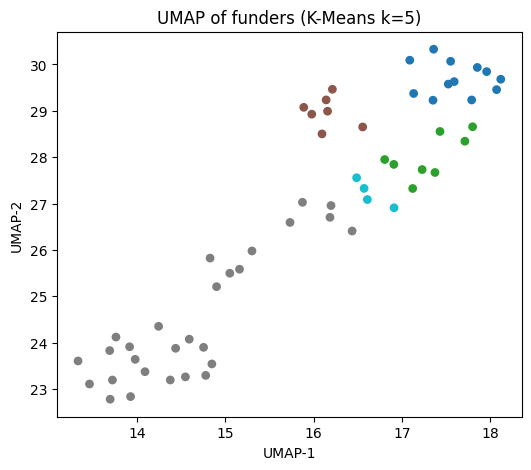

In [61]:
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt

# --- choose your final k ---
k_best = 5   # <-- set this to 5 based on your stability results

# --- prepare your feature matrix ---
X = df_kmeans.drop(columns=['Organization']).to_numpy(float)

# --- fit K-Means and attach labels ---
kmeans = KMeans(n_clusters=k_best, n_init=20, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(X)

# --- reduce to 2D with UMAP for visualization ---
reducer = umap.UMAP(random_state=42)
Z = reducer.fit_transform(X)

# --- plot ---
plt.figure(figsize=(6,5))
plt.scatter(Z[:,0], Z[:,1], c=df_kmeans['cluster'], s=28, cmap='tab10')
plt.title(f"UMAP of funders (K-Means k={k_best})")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()



In [62]:
# Get all feature columns except organization + cluster
feature_cols = df_kmeans.drop(columns=['Organization', 'cluster']).columns

# Compute cluster-level means
cluster_means = df_kmeans.groupby('cluster')[feature_cols].mean().round(2)
display(cluster_means.T.sort_index())


cluster,0,1,2,3,4
Athlete Foundation,0.00,0.00,0.14,0.00,0.00
Collegiate,0.17,0.00,0.00,0.00,0.00
Corporate Foundation,0.08,0.00,0.00,0.00,0.00
Crowdfunding,0.17,0.00,0.00,0.00,0.00
Education Foundation,0.00,0.00,0.00,0.00,0.00
Federal Grant,0.00,0.00,0.00,0.00,0.50
Geo_Focus,0.42,0.12,0.14,0.32,1.00
National Non-Profit,0.00,0.00,0.00,0.04,0.00
Pro Sports (MLB),0.17,0.00,0.14,0.00,0.00
Pro Sports (MLS),0.17,0.00,0.00,0.00,0.00


In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# isolate just the 30 PCA components
X_mission = data_full[[f"mission_pca_{i+1:02d}" for i in range(30)]].to_numpy()

# optional sanity check
print(X_mission.shape)   # (59, 30)


(59, 30)


In [64]:
scores = {}
for k in range(3, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(X_mission)
    scores[k] = silhouette_score(X_mission, labels)
    print(f"k={k}: silhouette={scores[k]:.3f}")

best_k = max(scores, key=scores.get)
print("Best k:", best_k, "silhouette:", scores[best_k])


k=3: silhouette=0.084
k=4: silhouette=0.086
k=5: silhouette=0.062
k=6: silhouette=0.085
k=7: silhouette=0.084
k=8: silhouette=0.052
k=9: silhouette=0.087
Best k: 9 silhouette: 0.08674751967191696


In [65]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
print("Calinski-Harabasz:", calinski_harabasz_score(X, labels))
print("Davies-Bouldin:", davies_bouldin_score(X, labels))


Calinski-Harabasz: 3.004244328912606
Davies-Bouldin: 3.3312479417465877


/opt/anaconda3/envs/Iterlight/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


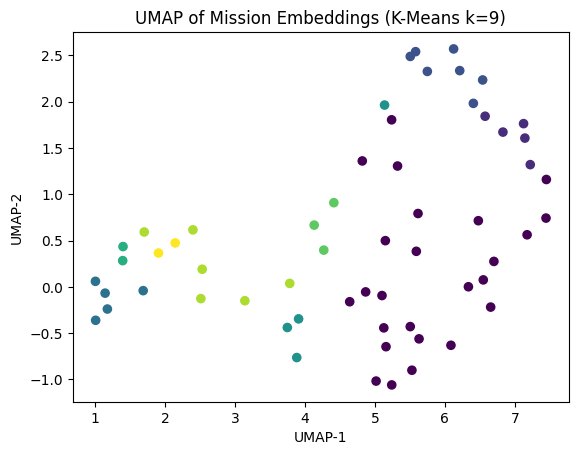

In [66]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(
    n_neighbors=8, min_dist=0.05, metric='cosine', random_state=42
)
Z = reducer.fit_transform(X_mission)

km = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels = km.fit_predict(X_mission)

plt.scatter(Z[:,0], Z[:,1], c=labels, s=35)
plt.title(f"UMAP of Mission Embeddings (K-Means k={best_k})")
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")
plt.show()


In [67]:
data_full['mission_cluster'] = KMeans(n_clusters=4, random_state=42, n_init=20).fit_predict(X_mission)

for k in sorted(data_full['mission_cluster'].unique()):
    orgs = data_full.loc[data_full['mission_cluster']==k, 'Organization'].tolist()
    print(f"\nCluster {k} ({len(orgs)} orgs):")
    print(", ".join(orgs))



Cluster 0 (10 orgs):
Kickstarter, Indiegogo, University of Florida Foundation, Florida State University Research Foundation, Philadelphia Eagles Foundation, Washington Commanders Foundation, U.S. Dept. of Education (EIR Program), National Science Foundation (NSF), Owl Ventures, Reach Capital

Cluster 1 (28 orgs):
NBA Foundation, San Francisco 49ers Foundation, Los Angeles Dodgers Foundation, Cleveland Browns Foundation, Miami Dolphins Foundation, Dallas Mavericks Foundation, Jacksonville Jaguars Foundation, Minnesota Vikings Foundation, Houston Texans Foundation, Chicago Bears Charities, New England Patriots Foundation, Laureus Sport for Good USA, Nike Community Impact Fund, Orlando Magic Youth Foundation (OMYF), Cleveland Cavaliers Community Foundation, Houston Rockets - Clutch City Foundation, Atlanta Falcons Youth Foundation, Baltimore Ravens Foundation, Dallas Cowboys Foundation, Detroit Lions Charities, Los Angeles Chargers Impact Fund, Los Angeles Rams Foundation, New Orleans Sa

In [68]:
for k in sorted(data_full['mission_cluster'].unique()):
    print(f"\nCluster {k}")
    subset = data_full[data_full['mission_cluster'] == k]['Mission / Stated Pillars']
    print(subset.sample(min(5, len(subset))).to_string(index=False))



Cluster 0
Almost exclusively dedicated to the Eagles Auti...
Funds 'AI-augmented learning' and 'Research on ...
The 'Grants for Application Proof of Concept (G...
Funds entrepreneurial, evidence-based, field-in...
Similar to Kickstarter but offers more flexible...

Cluster 1
Youth development and education. 'Community All...
Fosters cultural diversity, education, family a...
Neighborhood revitalization, youth development,...
Focuses on supporting youth in Texas through ed...
A smaller, family-run foundation that supports ...

Cluster 2
Honors a 'Community Hero' at each game with a $...
Focuses on supporting non-profits in Arizona th...
A non-profit charity working with Madison Squar...
2025 focus: Animal welfare, Health and wellness...
Supports organizations that enrich the Western ...

Cluster 3
Focuses on supporting youth athletic programs a...
Wellness, Education, Youth Hockey. Specific pro...
Youth Development (to boost academic performanc...
Children's Health and Education, Veter

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data_full['mission_clean'])
vocab = np.array(vectorizer.get_feature_names_out())

# average term frequency per cluster
df_counts = pd.DataFrame(X.toarray(), columns=vocab)
df_counts['cluster'] = data_full['mission_cluster']

# top words per cluster
for k in sorted(df_counts['cluster'].unique()):
    mean_freq = df_counts[df_counts['cluster']==k].drop(columns='cluster').mean()
    top_words = mean_freq.sort_values(ascending=False).head(10)
    print(f"\nCluster {k} keywords:")
    print(", ".join(top_words.index))



Cluster 0.0 keywords:
education, health, research, children, youth, risk, provides, families, fitness, supports

Cluster nan keywords:
000, 12, 14, 2025, 24, 50, academic, accepting, access, achievement

Cluster 1.0 keywords:
education, youth, development, health, programs, hockey, literacy, learn, children, justice

Cluster 2.0 keywords:
society, education, inclusive, employment, girls, health, focus, peaceful, areas, include

Cluster 3.0 keywords:
youth, non, education, supports, profits, health, children, educational, autism, community


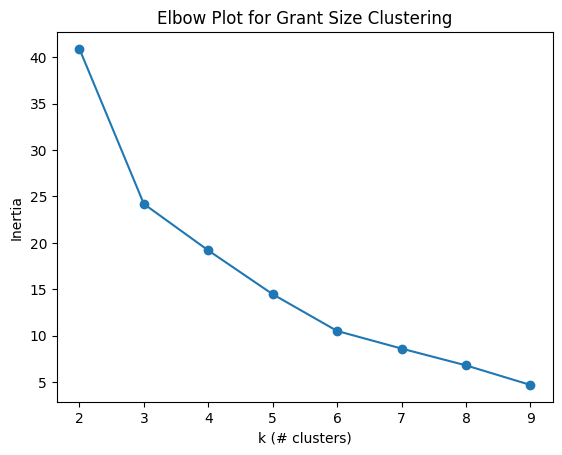

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# --- Step 1: Extract and log-transform ---
grants = data_full[['Typical Min. Grant Size', 'Typical Max. Grant Size']].copy()
grants_log = np.log1p(grants)  # compresses large values, keeps scale differences meaningful

# --- Step 2: Standardize for K-Means ---
scaler = StandardScaler()
grants_scaled = scaler.fit_transform(grants_log)

# --- Step 3: K-Means clustering ---
inertias = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    km.fit(grants_scaled)
    inertias.append(km.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2,10), inertias, marker='o')
plt.xlabel('k (# clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Grant Size Clustering')
plt.show()


In [72]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(grants_scaled)
    sil = silhouette_score(grants_scaled, labels)
    print(f"k={k}: silhouette={sil:.3f}")


k=2: silhouette=0.697
k=3: silhouette=0.566
k=4: silhouette=0.549
k=5: silhouette=0.547
k=6: silhouette=0.570
k=7: silhouette=0.574
k=8: silhouette=0.608
k=9: silhouette=0.620


In [73]:
kmeans_grant = KMeans(n_clusters=5, random_state=42, n_init=20)
data_full['grant_cluster'] = kmeans_grant.fit_predict(grants_scaled)

# Inspect
cluster_summary = data_full.groupby('grant_cluster')[['Typical Min. Grant Size','Typical Max. Grant Size']].mean()
print(cluster_summary)


               Typical Min. Grant Size  Typical Max. Grant Size
grant_cluster                                                  
0                         3.441667e+04             9.408333e+04
1                         3.444444e+03             8.333333e+03
2                         1.033333e+06             1.000000e+07
3                         5.473774e+03             4.329058e+04
4                         2.750000e+05             8.500000e+05


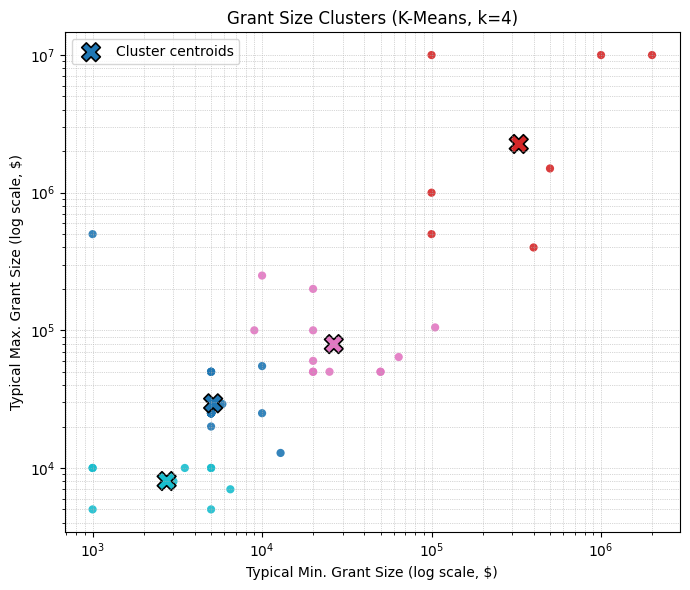


Cluster summary (cluster, n, median min $, median max $):
(0, 31, np.float64(5000.0), np.float64(25000.0))
(1, 7, np.float64(400000.0), np.float64(1500000.0))
(2, 12, np.float64(20000.0), np.float64(62000.0))
(3, 9, np.float64(3500.0), np.float64(10000.0))


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- 1) Prepare data (log dollars for modeling) ---
grant_cols = ['Typical Min. Grant Size','Typical Max. Grant Size']
G = data_full[grant_cols].to_numpy(dtype=float)
G_log = np.log1p(np.clip(G, a_min=0, a_max=None))   # model on log1p to handle skew

# --- 2) Scale + KMeans (choose k) ---
k = 4  # <- pick your k (try 3..5)
scaler = StandardScaler().fit(G_log)
G_scaled = scaler.transform(G_log)

kmeans_grant = KMeans(n_clusters=k, n_init=20, random_state=42)
labels = kmeans_grant.fit_predict(G_scaled)

# --- 3) Get centroids in ORIGINAL $ scale (inverse of scaling + expm1) ---
centers_log = scaler.inverse_transform(kmeans_grant.cluster_centers_)
centers_dollar = np.expm1(centers_log)  # back to dollars

# --- 4) Scatter plot in original dollars (log axes) ---
plt.figure(figsize=(7,6))
# points
plt.scatter(G[:,0], G[:,1], c=labels, s=35, alpha=0.9, cmap='tab10', edgecolors='none')
# centroids
plt.scatter(centers_dollar[:,0], centers_dollar[:,1], c=range(k), s=180, cmap='tab10', marker='X', edgecolors='black', linewidths=1.2, label='Cluster centroids')

plt.xscale('log'); plt.yscale('log')
plt.xlabel('Typical Min. Grant Size (log scale, $)')
plt.ylabel('Typical Max. Grant Size (log scale, $)')
plt.title(f'Grant Size Clusters (K-Means, k={k})')
plt.grid(True, which='both', ls=':', lw=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# --- 5) Attach labels & quick readable summary ---
data_full['grant_cluster'] = labels
summary = []
for c in range(k):
    idx = (labels == c)
    mean_min = np.median(G[idx,0]) if idx.any() else np.nan
    mean_max = np.median(G[idx,1]) if idx.any() else np.nan
    summary.append((c, int(idx.sum()), mean_min, mean_max))
print("\nCluster summary (cluster, n, median min $, median max $):")
for row in sorted(summary):
    print(row)


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# --- 1) Select numeric predictors except mission embeddings ---
features_no_text = [
    c for c in data_full.columns
    if (c not in ['Organization']) and
       (not c.startswith('mission_pca'))
]

X = data_full[features_no_text].copy()

# --- 2) Scale numeric (binary 0/1 columns are fine) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3) K-Means clustering ---
scores = {}
for k in range(3, 10):
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    scores[k] = sil
    print(f"k={k}: silhouette={sil:.3f}")

best_k = max(scores, key=scores.get)
print(f"\nBest k = {best_k}, silhouette = {scores[best_k]:.3f}")

# --- 4) Fit final model ---
kmeans_all = KMeans(n_clusters=best_k, n_init=20, random_state=42)
data_full['cluster_no_text'] = kmeans_all.fit_predict(X_scaled)


ValueError: could not convert string to float: 'Platform for creative, project-based funding with tangible rewards'